# SI 370 Project: Predicting Race Results for Hong Kong Horse Racing

### Data from: https://www.kaggle.com/datasets/gdaley/hkracing

### University of Michigan Fall '23

### Code Written by Brandon Huggard

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
races = pd.read_csv('races.csv')
runs = pd.read_csv('runs.csv')

In [3]:
runs.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


## EDA and Cleaning: Races Data

In [4]:
sns.set(rc={'figure.figsize':(12,8.5)})
sns.set_theme(style='whitegrid', palette='tab10', context='talk')

In [5]:
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [6]:
races.describe().applymap(lambda x: '%.0f' % x)

,race_id,race_no,surface,distance,prize,race_class,sec_time1,sec_time2,sec_time3,sec_time4,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
count,6349,6349,6349,6349,5887,6349,6349,6349,6349,3634,...,6324,23,6349,6349,6324,23,6349,6349,12,12
mean,3174,5,0,1419,1134790,4,21,23,24,24,...,7,8,28,33,39,22,6,96,8,101
std,1833,3,0,281,1749156,2,6,1,1,1,...,4,3,25,30,37,17,4,131,3,102
min,0,1,0,1000,485000,0,12,20,21,21,...,1,4,10,10,10,10,1,10,3,12
25%,1587,3,0,1200,675000,3,14,22,23,23,...,3,6,15,17,18,10,3,34,6,25
50%,3174,5,0,1400,840000,4,24,23,24,24,...,6,8,20,24,28,16,6,58,8,50
75%,4761,7,0,1650,1060000,4,25,23,24,24,...,10,11,31,36,44,25,9,106,11,179
max,6348,11,1,2400,25000000,13,30,27,28,29,...,14,14,410,627,420,68,14,2688,12,282


## EDA and Cleaning: Runs Data

In [7]:
races['date']= pd.to_datetime(races['date'])

In [8]:
#feature engineering to create a seasons column
races['month'] = races.date.dt.month
seasons = {(1, 12, 2): 'winter', (3, 4, 5): 'spring', (6, 7, 8): 'summer', (9, 10, 11): 'fall'}

def season_finder(hld):
    for k in seasons.keys():
        if hld in k:
            return seasons[k]

races['season'] = races.month.apply(season_finder)

In [9]:
races['season'].value_counts()

summer    2040
winter    1808
fall      1804
spring     697
Name: season, dtype: int64

In [10]:

runs

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95


In [11]:
runs.describe().applymap(lambda x: '%.0f' % x)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79447,79447,79447,79447,79447,79447,79447,79447,79447,79447,...,79447,79447,46226,10079,1296,79447,79447,75712,79447,79447
mean,3173,7,2204,7,0,6,3,61,1105,123,...,23,24,24,24,24,85,29,7,80,86
std,1833,4,1275,4,0,34,1,12,62,6,...,4,4,5,1,1,19,30,9,45,54
min,0,1,0,1,0,-0,2,10,693,103,...,20,21,21,21,22,55,1,1,0,0
25%,1586,4,1085,4,0,2,3,60,1062,118,...,22,23,23,23,24,71,8,2,47,39
50%,3174,7,2209,7,0,4,3,60,1102,123,...,23,24,24,24,24,83,15,4,75,76
75%,4764,10,3308,10,0,7,3,60,1146,128,...,24,24,25,25,25,101,38,9,118,138
max,6348,14,4404,14,1,999,10,138,1369,133,...,999,999,999,50,34,164,99,101,175,185


## Merging Races and Runs Data

In [12]:
races_small = races[['race_id', 'season', 'venue', 'config', 'surface', 
'distance', 'going', 'prize']]

runs_small = runs[['race_id', 'horse_id', 'trainer_id', 'jockey_id', 
'horse_age', 'horse_country', 'horse_type', 'horse_rating', 
'declared_weight', 'actual_weight', 'draw', 'finish_time']]

In [13]:
races_small.shape

(6349, 8)

In [14]:
runs_small.shape

(79447, 12)

In [15]:
df = pd.merge(runs_small, races_small, on='race_id', how='left')


In [16]:
df.columns

Index(['race_id', 'horse_id', 'trainer_id', 'jockey_id', 'horse_age',
       'horse_country', 'horse_type', 'horse_rating', 'declared_weight',
       'actual_weight', 'draw', 'finish_time', 'season', 'venue', 'config',
       'surface', 'distance', 'going', 'prize'],
      dtype='object')

In [17]:
for column in list(df.columns):
    print('The number of NA values in ' + str(column) + ' is ' 
    + str(df[column].isna().sum()))

The number of NA values in race_id is 0
The number of NA values in horse_id is 0
The number of NA values in trainer_id is 0
The number of NA values in jockey_id is 0
The number of NA values in horse_age is 0
The number of NA values in horse_country is 2
The number of NA values in horse_type is 2
The number of NA values in horse_rating is 0
The number of NA values in declared_weight is 0
The number of NA values in actual_weight is 0
The number of NA values in draw is 0
The number of NA values in finish_time is 0
The number of NA values in season is 0
The number of NA values in venue is 0
The number of NA values in config is 0
The number of NA values in surface is 0
The number of NA values in distance is 0
The number of NA values in going is 0
The number of NA values in prize is 5849


### Dealing with NA values:

- Fill rows where prize is NA with the median prize value

- Drop rows where horse_country or horse_type is NA 

In [18]:
prize_median = df.prize.median()
prize_median

800000.0

In [19]:
df['prize'].fillna(prize_median, inplace=True)

In [20]:
df.prize.value_counts()

800000.0     9595
850000.0     6983
625000.0     4607
760000.0     3590
725000.0     3561
             ... 
6600000.0      20
1600000.0      17
1272000.0      12
1398000.0      12
1482000.0      11
Name: prize, Length: 71, dtype: int64

In [21]:
df.shape

(79447, 19)

In [22]:
df.dropna(inplace=True)

In [23]:
df.columns

Index(['race_id', 'horse_id', 'trainer_id', 'jockey_id', 'horse_age',
       'horse_country', 'horse_type', 'horse_rating', 'declared_weight',
       'actual_weight', 'draw', 'finish_time', 'season', 'venue', 'config',
       'surface', 'distance', 'going', 'prize'],
      dtype='object')

In [24]:
for column in list(df.columns):
    print('The number of NA values in ' + str(column) + ' is ' 
    + str(df[column].isna().sum()))

The number of NA values in race_id is 0
The number of NA values in horse_id is 0
The number of NA values in trainer_id is 0
The number of NA values in jockey_id is 0
The number of NA values in horse_age is 0
The number of NA values in horse_country is 0
The number of NA values in horse_type is 0
The number of NA values in horse_rating is 0
The number of NA values in declared_weight is 0
The number of NA values in actual_weight is 0
The number of NA values in draw is 0
The number of NA values in finish_time is 0
The number of NA values in season is 0
The number of NA values in venue is 0
The number of NA values in config is 0
The number of NA values in surface is 0
The number of NA values in distance is 0
The number of NA values in going is 0
The number of NA values in prize is 0


## EDA and Cleaning: Merged Data 

dfRace_id, date (season FE), venue, config (OHE), surface, distance, going, prize: races.csv

Race_id, horse_age, horse_country, horse_type, horse_rating, declared_weight, actual_weight, draw, finish_time, trainer_id-jockey_id-horse-id (all 3 need respective feature engineering)

In [25]:
corr=df[['finish_time', 'horse_age',  'declared_weight', 'actual_weight', 'draw', 'surface', 'distance', 'prize']].corr()
corr.style.background_gradient(cmap='icefire').set_precision(2)
#Not a lot of correlation so we should make new feature

,finish_time,horse_age,declared_weight,actual_weight,draw,surface,distance,prize
finish_time,1.00,0.08,-0.11,0.01,0.00,0.00,1.00,0.14
horse_age,0.08,1.00,0.01,0.01,-0.01,0.04,0.08,0.06
declared_weight,-0.11,0.01,1.00,0.04,0.00,0.01,-0.11,0.03
actual_weight,0.01,0.01,0.04,1.00,0.00,-0.01,0.01,0.04
draw,0.00,-0.01,0.00,0.00,1.00,-0.00,0.00,-0.01
surface,0.00,0.04,0.01,-0.01,-0.00,1.00,0.01,-0.05
distance,1.00,0.08,-0.11,0.01,0.00,0.01,1.00,0.15
prize,0.14,0.06,0.03,0.04,-0.01,-0.05,0.15,1.00


In [26]:
df.describe().applymap(lambda x: '%.0f' % x)

,race_id,horse_id,trainer_id,jockey_id,horse_age,horse_rating,declared_weight,actual_weight,draw,finish_time,surface,distance,prize
count,79445,79445,79445,79445,79445,79445,79445,79445,79445,79445,79445,79445,79445
mean,3173,2204,80,86,3,61,1105,123,7,85,0,1419,1094100
std,1833,1275,45,54,1,12,62,6,4,19,0,277,1671764
min,0,0,0,0,2,10,693,103,1,55,0,1000,485000
25%,1586,1085,47,39,3,60,1062,118,4,71,0,1200,675000
50%,3175,2209,75,76,3,60,1102,123,7,83,0,1400,800000
75%,4765,3308,118,138,3,60,1146,128,10,101,0,1650,1000000
max,6348,4404,175,185,10,138,1369,133,15,164,1,2400,25000000


Text(0.5, 1.0, 'Horse_Rating Histrogram')

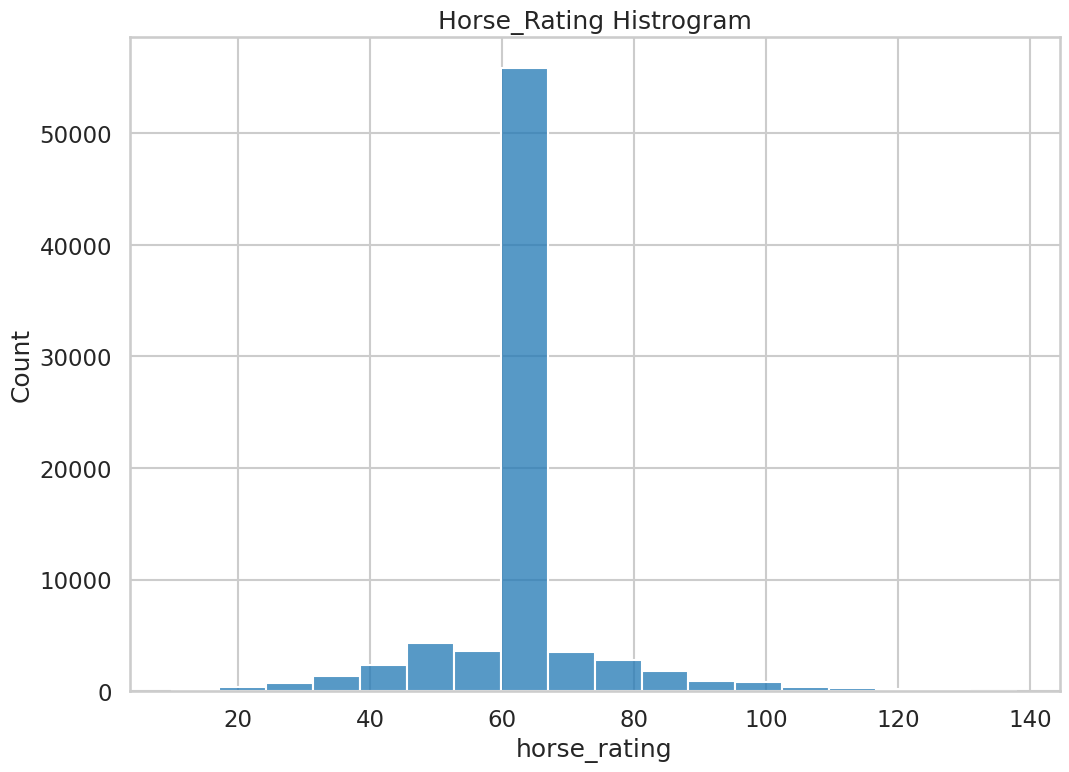

In [27]:
sns.histplot(df["horse_rating"]).set_title("Horse_Rating Histrogram") #can probably not use this column 

Text(0.5, 1.0, 'Horse_Country Histrogram')

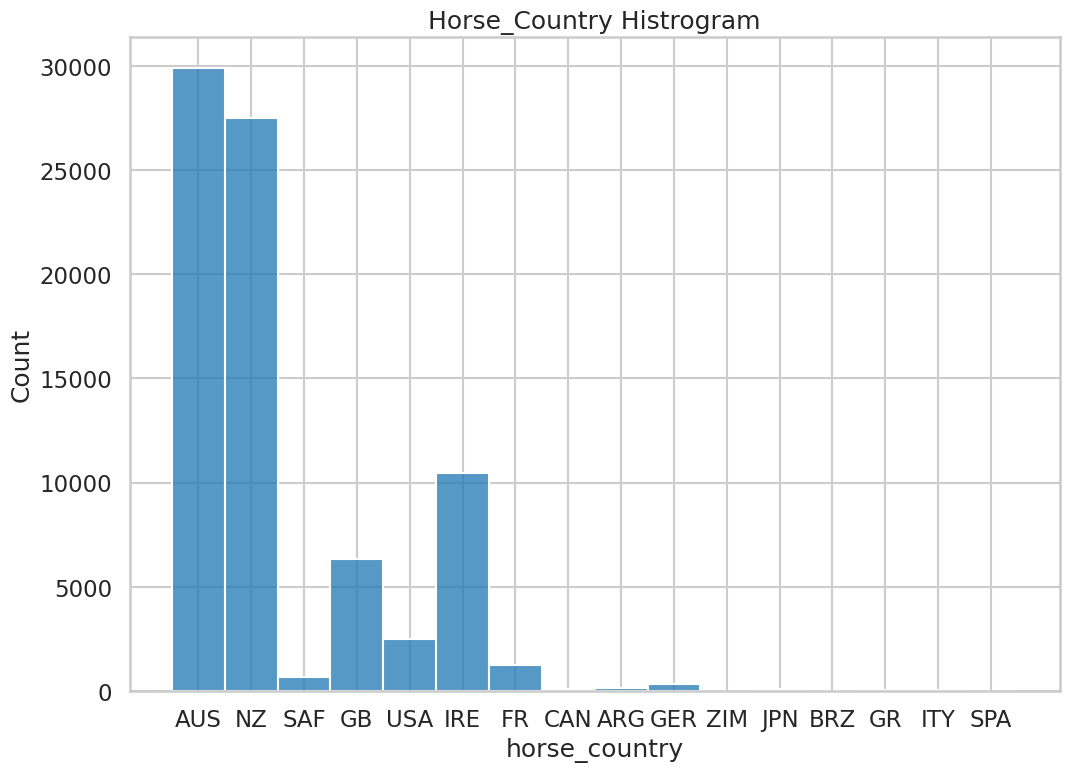

In [28]:
sns.histplot(df.horse_country).set_title("Horse_Country Histrogram")

Text(0.5, 1.0, 'Horse_Age Histogram')

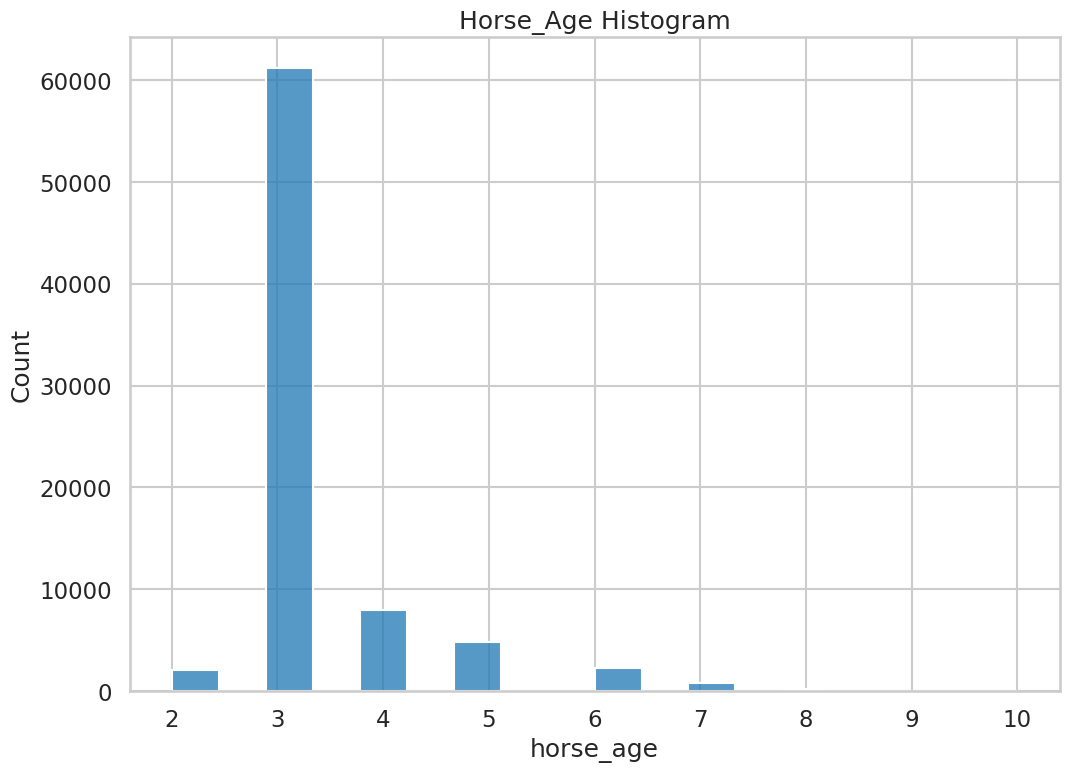

In [29]:
sns.histplot(df.horse_age).set_title("Horse_Age Histogram") #skewed to the right

Text(0.5, 1.0, 'Horse_Type Histogram')

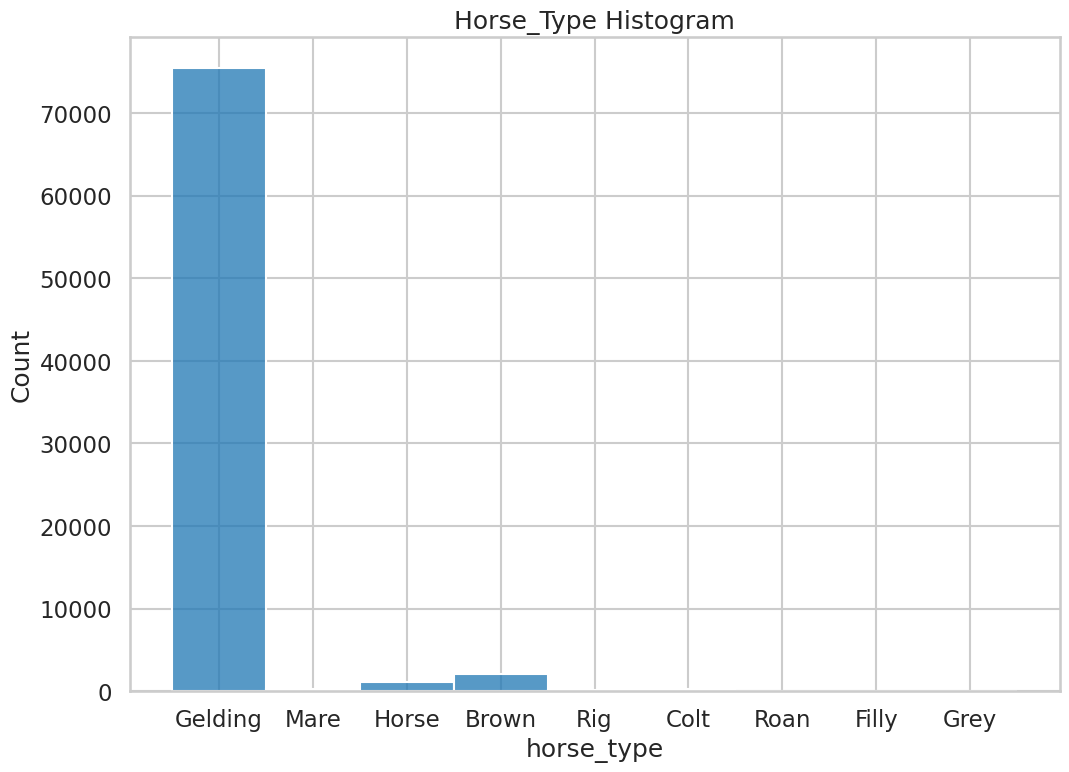

In [30]:
sns.histplot(df.horse_type).set_title("Horse_Type Histogram")#can probably drop this column because its very heavily skewed.

Text(0.5, 1.0, 'Declared_Weight Histogram')

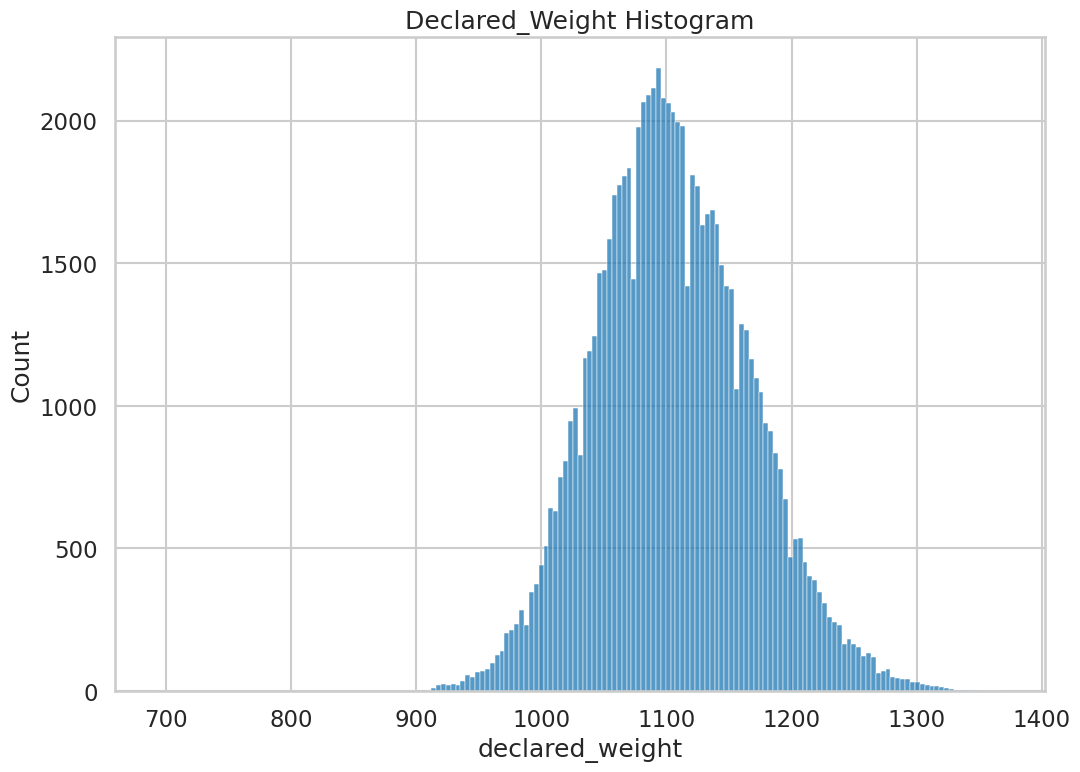

In [31]:
sns.histplot(df.declared_weight).set_title("Declared_Weight Histogram")#normal distribution

Text(0.5, 1.0, 'Actual_Weight Histogram')

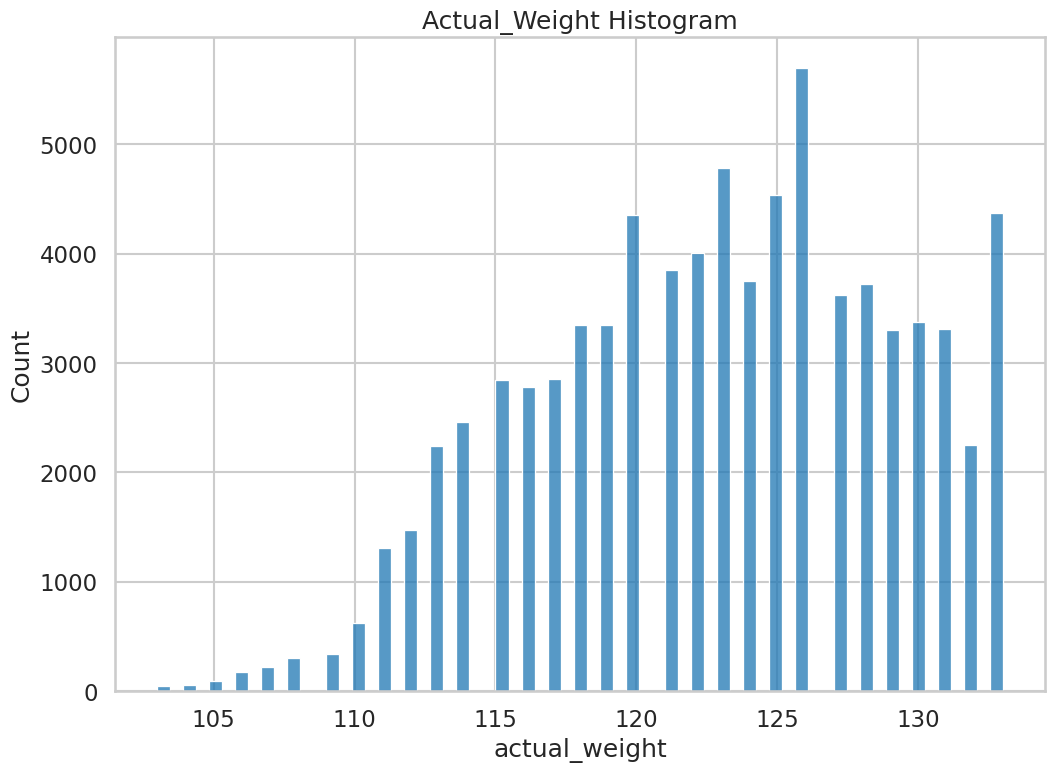

In [32]:
sns.histplot(df.actual_weight).set_title("Actual_Weight Histogram")#skewed left

Text(0.5, 1.0, 'Finish_Time Histogram')

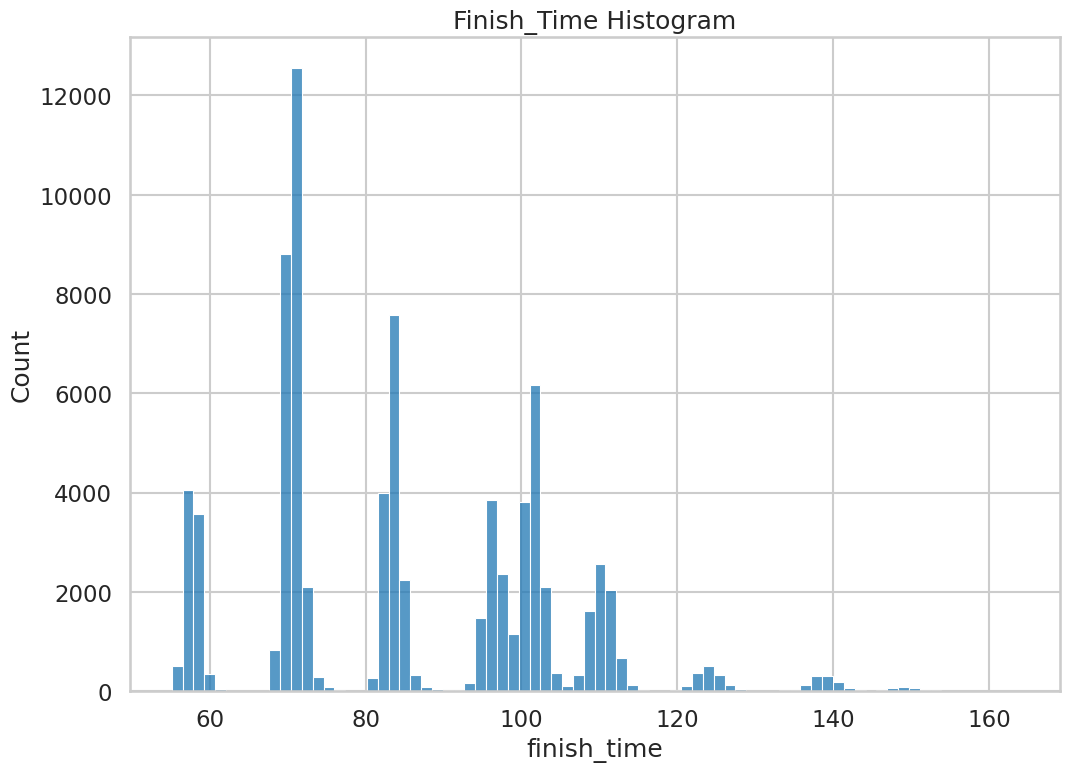

In [33]:
sns.histplot(df.finish_time).set_title("Finish_Time Histogram") #reflects different distances

<AxesSubplot: xlabel='going', ylabel='Count'>

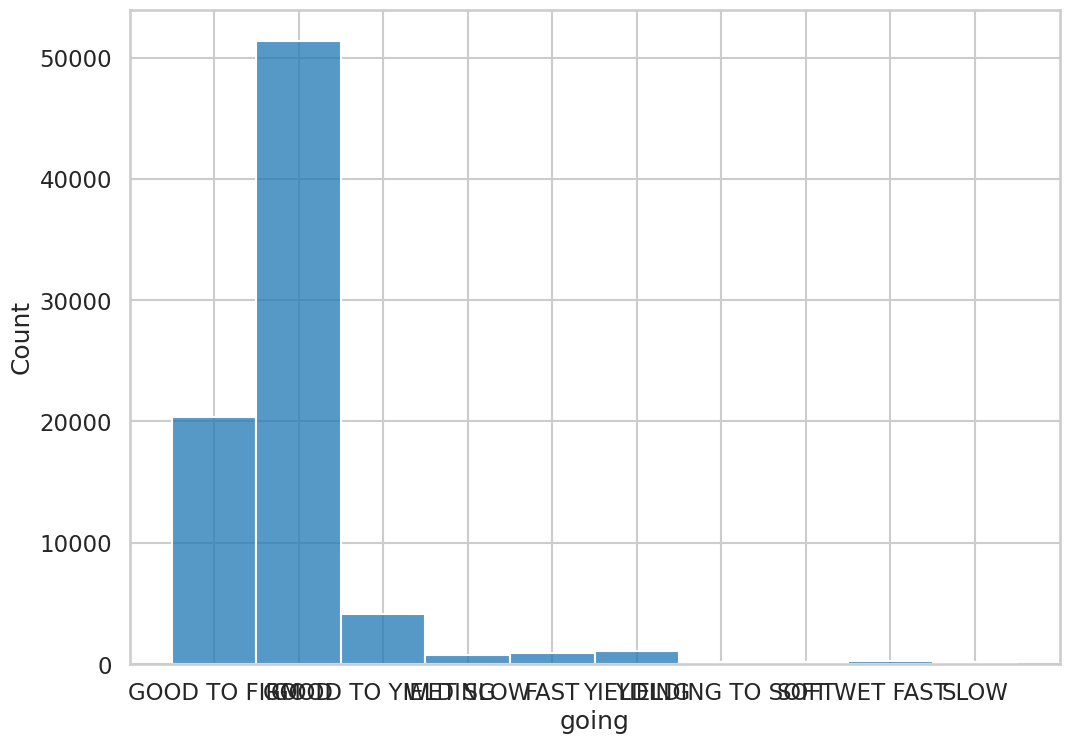

In [34]:
sns.histplot(df.going)

<AxesSubplot: xlabel='config', ylabel='Count'>

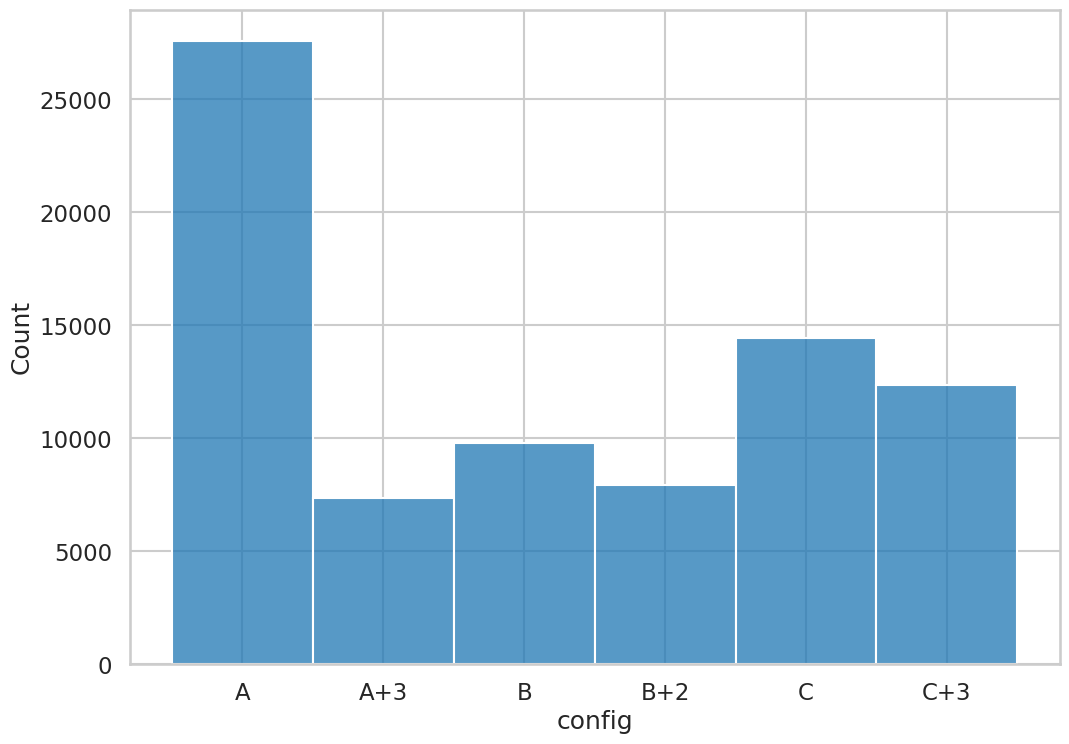

In [35]:
sns.histplot(df.config)

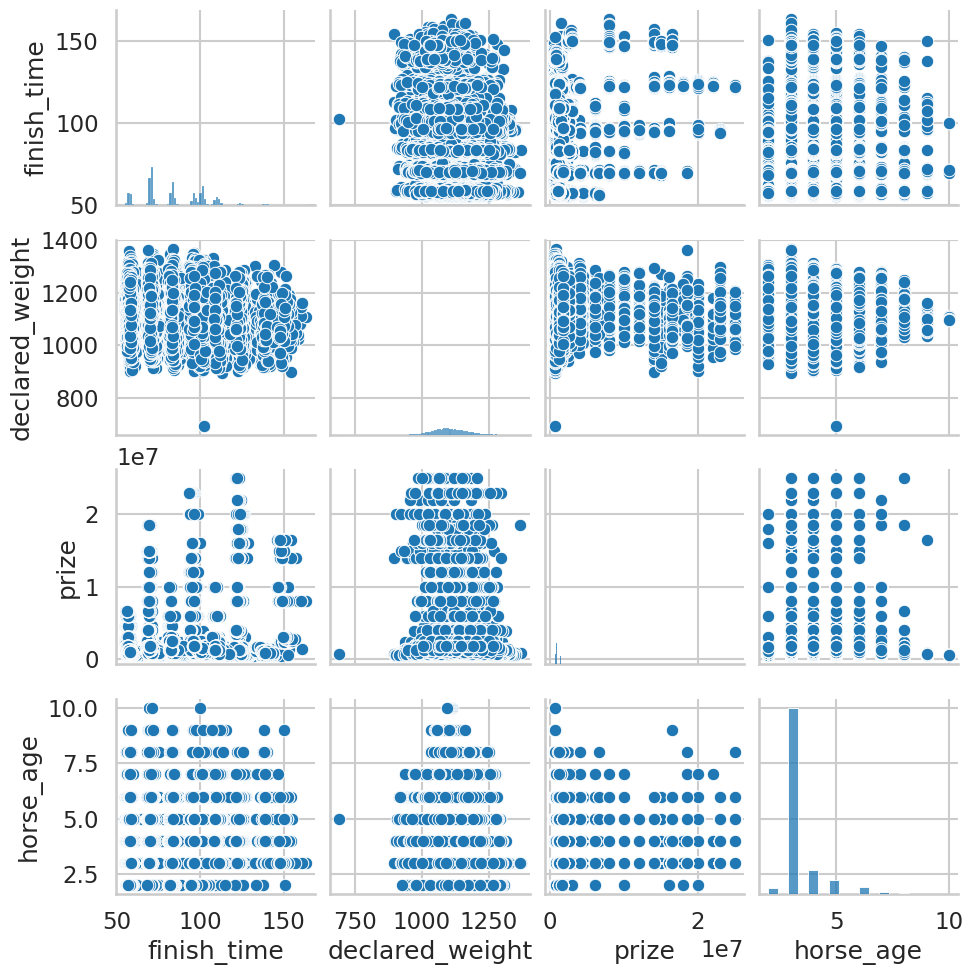

In [36]:
sns.pairplot(data=df, vars=['finish_time', 'declared_weight', 'prize', 'horse_age'])

In [37]:
df.distance.value_counts()

1200    24696
1400    14565
1650    13253
1000     8523
1600     8329
1800     7320
2000     1463
2200     1034
2400      262
Name: distance, dtype: int64

### Feature Engineering

In [38]:
horse_tot_race=runs.groupby(['horse_id'])['result'].apply(lambda x: (x).sum()).reset_index(
    name='horse_tot_race')
df=pd.merge(df,horse_tot_race,on='horse_id',how='left')
horse_tot_place=runs.groupby(['horse_id'])['result'].apply(lambda x: (x <=3).sum()).reset_index(
    name='horse_tot_place')
df=pd.merge(df,horse_tot_place,on='horse_id',how='left')

In [39]:
jockey_tot_race=runs.groupby(['jockey_id'])['result'].apply(lambda x: (x).sum()).reset_index(name='jockey_tot_race')
df=pd.merge(df,jockey_tot_race,on='jockey_id',how='left')
jockey_tot_place=runs.groupby(['jockey_id'])['result'].apply(lambda x: (x <=3).sum()).reset_index(name='jockey_tot_place')
df=pd.merge(df,jockey_tot_place,on='jockey_id',how='left')

In [40]:
trainer_tot_race=runs.groupby(['trainer_id'])['result'].apply(lambda x: (x).sum()).reset_index(name='trainer_tot_race')
df=pd.merge(df,trainer_tot_race,on='trainer_id',how='left')
trainer_tot_place=runs.groupby(['trainer_id'])['result'].apply(lambda x: (x <=3).sum()).reset_index(name='trainer_tot_place')
df=pd.merge(df,trainer_tot_place,on='trainer_id',how='left')

In [41]:
#new horse features
df['horse_place_perc']=df['horse_tot_place']/df['horse_tot_race']

#new jockey features
df['jockey_place_perc']=df['jockey_tot_place']/df['jockey_tot_race']

#new trainer features
df['trainer_place_perc']=df['trainer_tot_place']/df['trainer_tot_race']

In [42]:
df=df.drop('horse_tot_place',axis=1)
df=df.drop('horse_tot_race',axis=1)
df=df.drop('horse_id',axis=1)
df=df.drop('trainer_tot_place',axis=1)
df=df.drop('trainer_tot_race',axis=1)
df=df.drop('trainer_id',axis=1)
df=df.drop('jockey_tot_place',axis=1)
df=df.drop('jockey_tot_race',axis=1)
df=df.drop('jockey_id',axis=1)
df=df.drop('horse_rating',axis=1)
df=df.drop('horse_type', axis=1)
df=df.drop('race_id', axis=1)

Text(0.5, 1.0, 'Season vs. Finish Time')

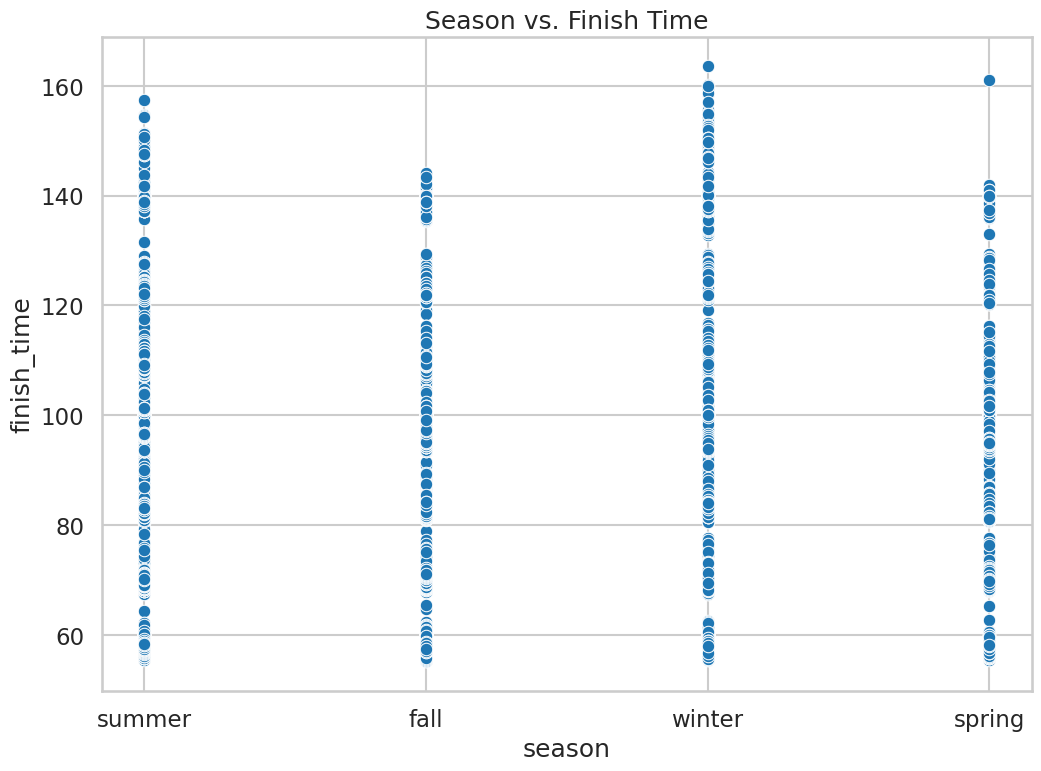

In [43]:
sns.scatterplot(data=df, x='season', y='finish_time').set_title('Season vs. Finish Time')

In [44]:
corr2 = df[['finish_time', 'horse_place_perc', 'jockey_place_perc', 'trainer_place_perc', 'season']].corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

,finish_time,horse_place_perc,jockey_place_perc,trainer_place_perc
finish_time,1.00,-0.06,0.01,0.01
horse_place_perc,-0.06,1.00,0.21,0.30
jockey_place_perc,0.01,0.21,1.00,0.24
trainer_place_perc,0.01,0.30,0.24,1.00


Text(0.5, 1.0, 'Finish_Time and Distance Scatterplot')

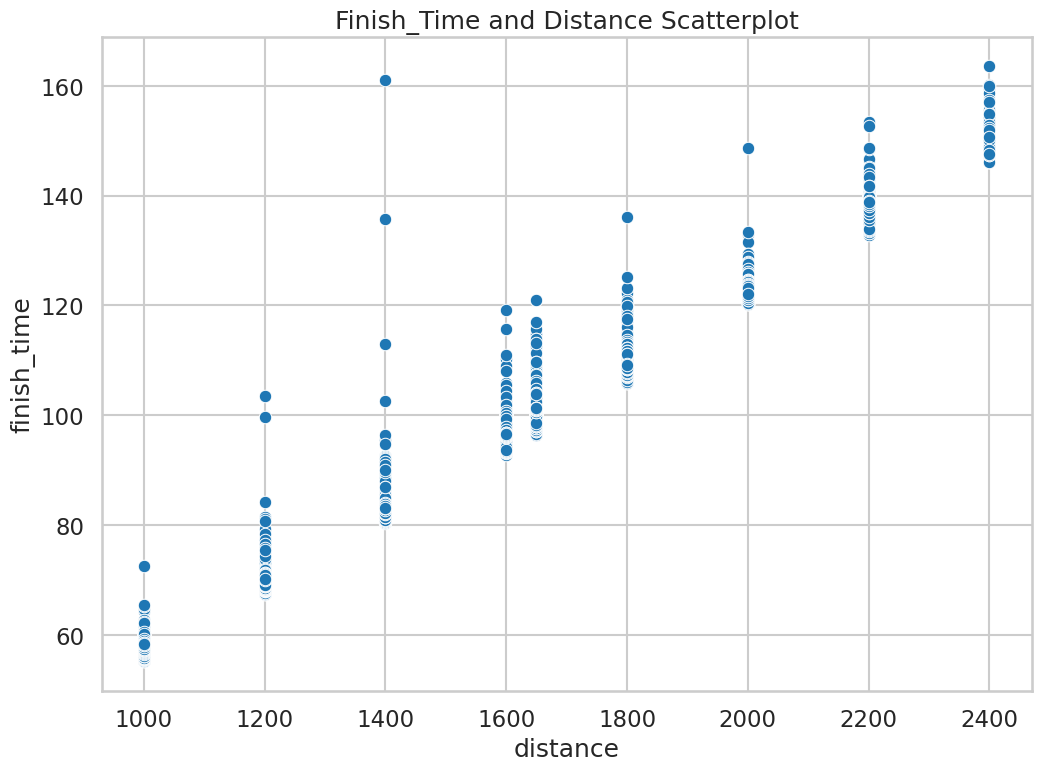

In [45]:
sns.scatterplot(data=df, x='distance', y='finish_time').set_title("Finish_Time and Distance Scatterplot")

## Split the Data into Test and Train

In [46]:
#train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[['horse_country']])
#y_train = train_df['finish_time']
#X_train = train_df.drop('finish_time', axis=1)

#y_test = test_df['finish_time']
#X_test = test_df.drop('finish_time', axis=1)

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df, df['horse_country']):
    train_df = df.loc[df.index.intersection(train_index)]
    test_df = df.loc[df.index.intersection(test_index)]

In [48]:
y_train = train_df['finish_time']
X_train = train_df.drop('finish_time', axis=1)

y_test = test_df['finish_time']
X_test = test_df.drop('finish_time', axis=1)
X_train.columns

Index(['horse_age', 'horse_country', 'declared_weight', 'actual_weight',
       'draw', 'season', 'venue', 'config', 'surface', 'distance', 'going',
       'prize', 'horse_place_perc', 'jockey_place_perc', 'trainer_place_perc'],
      dtype='object')

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = list(X_train.select_dtypes(include=np.number))
cat_cols = list(X_train.select_dtypes(exclude=np.number))

ct = ColumnTransformer (
    [("num", StandardScaler(),num_cols),
     ("cat", OneHotEncoder(),cat_cols)])

X_train_processed = ct.fit_transform(X_train)
X_test_processed = ct.fit_transform(X_test)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rf = RandomForestRegressor()

In [51]:
lr.fit(X_train_processed,y_train)

LinearRegression()

In [52]:
lr.score(X_train_processed,y_train)

0.9961911032376989

In [53]:
rf.fit(X_train_processed,y_train)

RandomForestRegressor()

In [54]:
rf.score(X_train_processed,y_train)

0.9996190547687409

In [55]:
len(rf.feature_importances_)

48

In [56]:
y_train_1200 = train_df[train_df['distance'] == 1200]['finish_time']
X_train_1200 = train_df[train_df['distance'] == 1200].drop(['finish_time', 'distance'], axis=1)

y_test_1200 = test_df[test_df['distance'] == 1200]['finish_time']
X_test_1200 = test_df[test_df['distance'] == 1200].drop(['finish_time', 'distance'], axis=1)

num_cols = list(X_train_1200.select_dtypes(include=np.number))
cat_cols = list(X_train_1200.select_dtypes(exclude=np.number))

ct = ColumnTransformer (
    [("num", StandardScaler(),num_cols),
     ("cat", OneHotEncoder(),cat_cols)])

X_train_1200_processed = ct.fit_transform(X_train_1200)
X_test_1200_processed = ct.transform(X_test_1200)

In [57]:
X_test[cat_cols].columns

Index(['horse_country', 'season', 'venue', 'config', 'going'], dtype='object')

In [58]:
X_train[num_cols].columns

Index(['horse_age', 'declared_weight', 'actual_weight', 'draw', 'surface',
       'prize', 'horse_place_perc', 'jockey_place_perc', 'trainer_place_perc'],
      dtype='object')

In [59]:
lr.fit(X_train_1200_processed,y_train_1200)

LinearRegression()

In [60]:
lr.score(X_train_1200_processed,y_train_1200)

0.3010993192334962

In [61]:
rf.fit(X_train_1200_processed,y_train_1200)

RandomForestRegressor()

In [62]:
rf.score(X_train_1200_processed,y_train_1200)

0.9194924490630481

In [63]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators=[('lr',lr),('rf',rf)])
vr.fit(X_train_1200_processed,y_train_1200)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor())])

In [64]:
vr.score(X_train_1200_processed,y_train_1200)

0.7056986290631121

In [65]:
X_test_1200_processed.shape

(4929, 47)

In [66]:
X_train_1200_processed.shape

(19767, 47)

In [67]:
#Best model is random forest

In [68]:
predictions = pd.DataFrame(rf.predict(X_test_1200_processed))
predictions['predicted'] = "Predicted"


In [69]:
y_test_1200_new = pd.DataFrame(y_test_1200.copy())
y_test_1200_new['predicted'] = "Actual"

In [70]:
pred_vs_actual = pd.concat([y_test_1200_new, predictions.rename(columns={0: 'finish_time'})], axis=0)

In [71]:
pred_vs_actual

,finish_time,predicted
15,71.4700,Actual
22,71.4100,Actual
24,72.5400,Actual
25,70.8700,Actual
27,70.8100,Actual
...,...,...
4924,70.2278,Predicted
4925,70.5408,Predicted
4926,69.9938,Predicted
4927,69.3457,Predicted


Text(0.5, 1.0, 'Actual vs. Predicted Scatterplot')

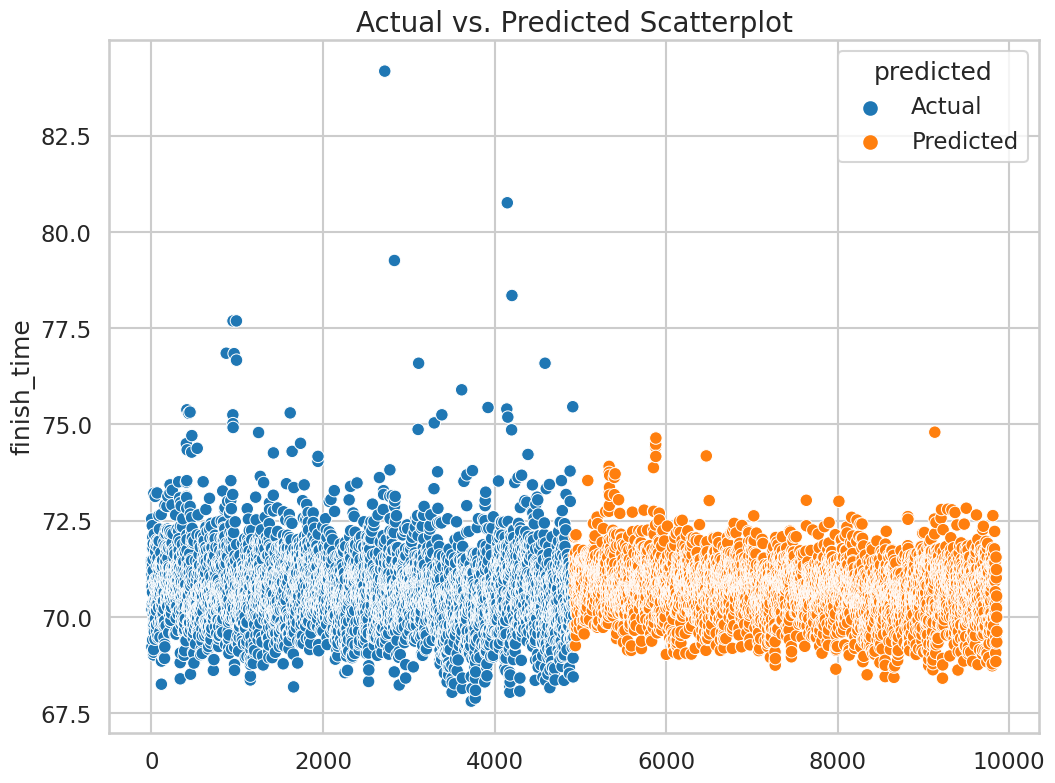

In [72]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_theme(style='whitegrid', palette='tab10', context='talk')
sns.scatterplot(data=pred_vs_actual.reset_index(drop=True), 
                x=pred_vs_actual.reset_index(drop=True).index, 
                y='finish_time', hue='predicted').set_title('Actual vs. Predicted Scatterplot', fontdict = { 'fontsize': 20})

Text(0.5, 1.0, 'Actual vs. Predicted Histogram')

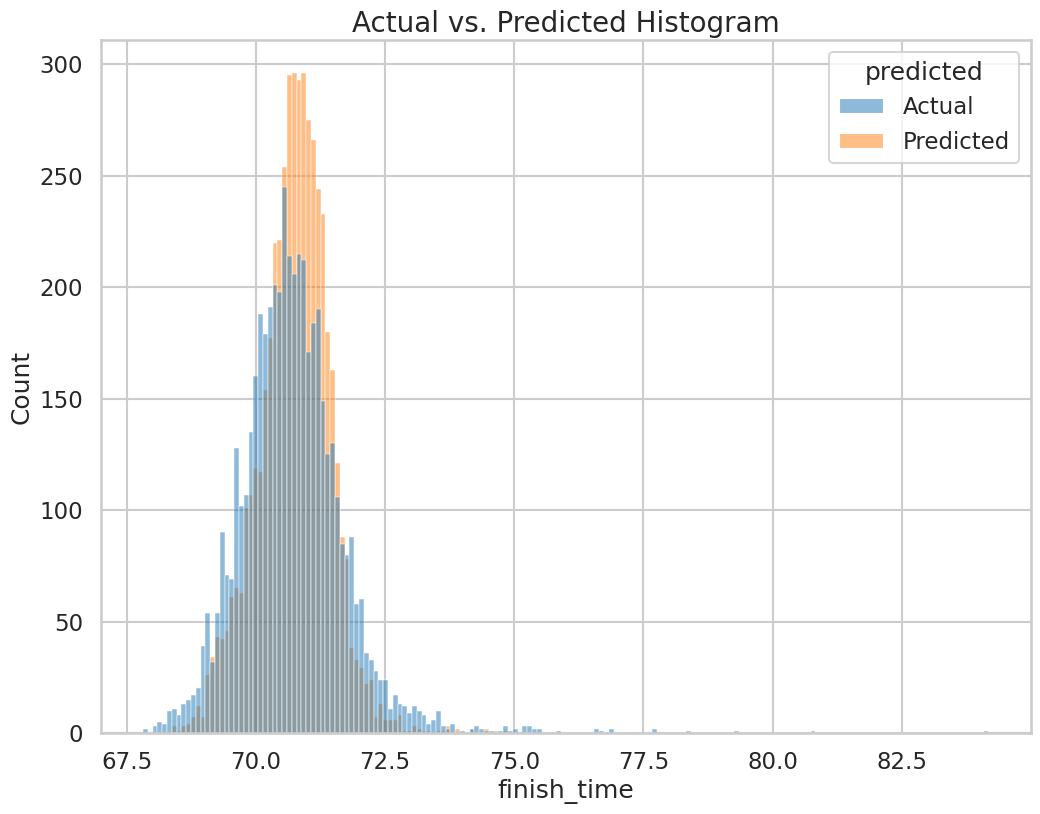

In [73]:
sns.histplot(data=pred_vs_actual, x="finish_time",hue="predicted").set_title('Actual vs. Predicted Histogram', fontdict = { 'fontsize': 20})

In [74]:
#from sklearn.model_selection import StratifiedShuffleSplit

#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in sss.split(df_new, df_new['distance']):
    #training_set = df_new.loc[df_new.index.intersection(train_index)]
     #esting_set = df_new.loc[df_new.index.intersection(test_index)]

In [75]:
# lr.score(X_train_new_prepared,y_train_new)

In [76]:
import sklearn

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names_out()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names


In [77]:
ct['cat'].coef_

TypeError: 'ColumnTransformer' object is not subscriptable

In [78]:
get_feature_names(ct)

/tmp/ipykernel_76/2720407043.py:32: UserWarning: Transformer num (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['num__horse_age',
 'num__declared_weight',
 'num__actual_weight',
 'num__draw',
 'num__surface',
 'num__prize',
 'num__horse_place_perc',
 'num__jockey_place_perc',
 'num__trainer_place_perc',
 'cat__horse_country_ARG',
 'cat__horse_country_AUS',
 'cat__horse_country_BRZ',
 'cat__horse_country_CAN',
 'cat__horse_country_FR',
 'cat__horse_country_GB',
 'cat__horse_country_GER',
 'cat__horse_country_GR',
 'cat__horse_country_IRE',
 'cat__horse_country_ITY',
 'cat__horse_country_JPN',
 'cat__horse_country_NZ',
 'cat__horse_country_SAF',
 'cat__horse_country_SPA',
 'cat__horse_country_USA',
 'cat__horse_country_ZIM',
 'cat__season_fall',
 'cat__season_spring',
 'cat__season_summer',
 'cat__season_winter',
 'cat__venue_HV',
 'cat__venue_ST',
 'cat__config_A',
 'cat__config_A+3',
 'cat__config_B',
 'cat__config_B+2',
 'cat__config_C',
 'cat__config_C+3',
 'cat__going_FAST',
 'cat__going_GOOD',
 'cat__going_GOOD TO FIRM',
 'cat__going_GOOD TO YIELDING',
 'cat__going_SLOW',
 'cat__going_SOFT'

In [79]:
rf.feature_importances_

array([1.53691435e-02, 9.43804316e-02, 6.58911456e-02, 5.30760767e-02,
       4.93857082e-02, 1.88645258e-01, 1.56356413e-01, 6.66884677e-02,
       5.66635732e-02, 1.78488473e-04, 8.15630835e-03, 6.34261992e-08,
       1.23132089e-03, 1.12547124e-03, 1.13578231e-02, 1.68064289e-05,
       6.67229729e-05, 5.21371847e-03, 9.87611137e-05, 5.72246023e-05,
       9.61107540e-03, 1.59143077e-03, 1.75460862e-06, 4.09058027e-03,
       2.58836120e-06, 9.86467935e-03, 9.59352924e-03, 8.56357212e-03,
       1.01865723e-02, 2.64724911e-02, 1.90768780e-02, 7.52250491e-03,
       4.17154039e-03, 6.28662929e-03, 5.20251956e-03, 4.43698765e-03,
       1.54160689e-02, 3.67676913e-03, 1.51800032e-02, 1.86233979e-02,
       9.10072439e-03, 4.13379773e-04, 8.23054275e-03, 6.15501968e-04,
       1.05393174e-02, 8.26681283e-03, 9.30322174e-03])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea3e0742-1638-4ce0-a99a-21185f24834d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>